In [50]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from glob import glob
import torch
from os import listdir
from os.path import splitext
import logging, librosa
from torch.utils.data import Dataset, IterableDataset
import numpy as np
import torch
from librosa import display
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as signal
from matplotlib import cm
from sklearn import preprocessing
from torch.utils.data import DataLoader, random_split
import torchvision.utils as vutils
import torchvision.transforms as transforms
import os, IPython, random
from spectrogram import Spectrogram

In [51]:
path="/Users/zombie/Downloads/LJSpeech-1.1/specs/"
rev="/Users/zombie/Downloads/LJSpeech-1.1/reverbedWavs/"
wavPath="/Users/zombie/Downloads/theWitcher/wavs/"
revPath="/Users/zombie/Downloads/theWitcher/revWavs/"

In [4]:
from preprocessAudio import reverbify

In [5]:
aud1='/Users/zombie/Downloads/theWitcher/wavs/audio126.wav'
aud2='/Users/zombie/Downloads/theWitcher/revWavs/audio126.wav'

In [59]:
from itertools import chain, islice, cycle

In [69]:
class MyIterableDataset(IterableDataset):
    def __init__(self, data_list): 
        self.data_list = data_list
    def process_data(self, data): 
        for x in data:
            yield x
    def get_stream(self, data_list):

        return chain.from_iterable(map(self.process_data, cycle(data_list))) 
    
    def __iter__(self):
        return self.get_stream(self.data_list)

In [70]:
data_list = [
[12, 13, 14, 15, 16, 17],
[27, 28, 29],
[31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43],
]

In [71]:
iterableDataset=MyIterableDataset(data_list)

In [72]:
loader=DataLoader(iterableDataset, batch_size=4)


In [76]:
# for batch in islice(loader, 12):
#     print(batch)

In [ ]:
class Dataset(IterableDataset):
    def __init__(self, orgDir, revDir, batchSize):
        self.ids=[i for i in os.listdir(revDir)]
        self.orgDir=orgDir
        self.revDir=revDir
        self.batchSize=batchSize
        
    def chunks(self, matrix, n=256):
        for i in range(0, len(matrix), n):
            yield matrix[i:i + n]

        
    def encoding(self, audio):
        
        a
        
        
    def __len__(self):
        return len(self.ids)

In [77]:
# [i for i in os.listdir(revPath)]

In [6]:
s=Spectrogram(wavPath, arrPath, path)

In [25]:
a1, _=librosa.load(aud1, sr=22050)
a2, _=librosa.load(aud2, sr=22050)

In [26]:
a2

array([ 2.0210994e-17, -6.7369977e-18,  3.3684989e-18, ...,
        3.3310748e-13,  3.3684988e-17, -2.0210994e-17], dtype=float32)

In [27]:
a2=librosa.stft(a2, window='hamming', win_length=256, n_fft=512)

In [30]:
np.abs(a2)==0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
m1, m2, p=s.audioToSpec(a1, a2)

In [33]:
m2[0][1]

1.397798386454076e-16

In [9]:
m1.shape

(257, 27649)

In [ ]:
class Dataset(IterableDataset)

(257, 32928)

In [80]:
a2.shape

(257, 4116)

In [79]:
temp.shape

torch.Size([16, 1, 256, 256])

In [78]:
temp=torch.tensor(list(chunks(np.abs(a2[:-1].T), 256))[:-1], dtype=torch.float32).unsqueeze(1)

In [15]:
temp=torch.tensor(list(chunks(m2[:-1].T, 256))[:-1], dtype=torch.float32).unsqueeze(1)

In [44]:
temp[:108].shape

torch.Size([16, 1, 256, 256])

In [45]:
temp.shape

torch.Size([16, 1, 256, 256])

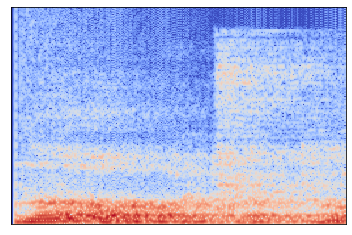

In [49]:
librosa.display.specshow(librosa.power_to_db(temp[0][0].T**2))

In [43]:
arr

torch.Size([108, 1, 256, 256])

In [9]:
p.dtype

dtype('float64')

In [10]:
IPython.display.Audio(s.specToAudio(m2, p), rate=22050)

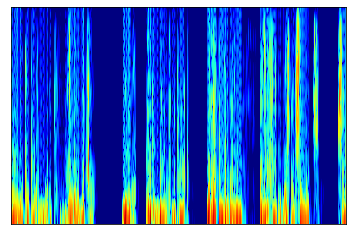

In [11]:
librosa.display.specshow(librosa.power_to_db(m1**2), cmap=cm.jet)

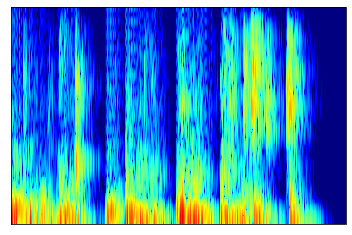

In [12]:
librosa.display.specshow(librosa.power_to_db(m2**2), cmap=cm.jet)

In [13]:
IPython.display.Audio(s.specToAudio(m2, p), rate=22050)

In [14]:
s1=librosa.stft(a1, n_fft=512, window='hamming', win_length=512)

In [15]:
mag=np.abs(s1)

In [30]:
torch.from_numpy(mag).unsqueeze(0).shape

torch.Size([1, 257, 1729])

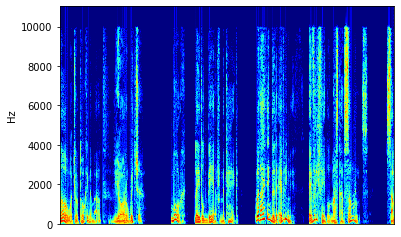

In [24]:
librosa.display.specshow(librosa.power_to_db(mag**2),y_axis="hz", cmap=cm.jet)

In [17]:
phase=np.angle(s1, deg=True)

In [18]:
IPython.display.Audio(librosa.istft(mag*np.cos(phase)+1j*mag*np.sin(phase), window='hamming', win_length=512), rate=22050)

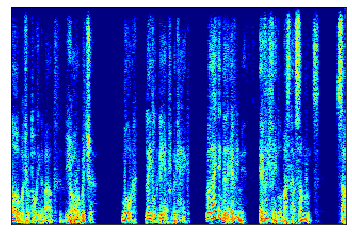

In [119]:
librosa.display.specshow(librosa.power_to_db(m1**2), cmap=cm.jet)

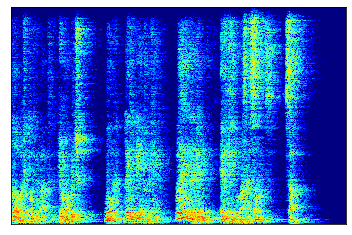

In [121]:
librosa.display.specshow(librosa.power_to_db(m2**2), cmap=cm.jet)

In [122]:
m1.shape

(1025, 314)

In [123]:
m2.shape

(1025, 374)

In [113]:
IPython.display.Audio(librosa.istft(m1+1j*p1), rate=16000)

In [124]:
IPython.display.Audio(librosa.istft(m2+1j*p2), rate=16000)

In [126]:
IPython.display.Audio(librosa.istft(m2[:, :314]+1j*p1), rate=16000)

In [8]:
sound=librosa.load('piano_c.wav', sr=16000)

In [9]:
IPython.display.Audio(sound[0], rate=16000)

In [28]:
mag, phase=librosa.magphase(librosa.stft(a1))

In [76]:
t=2+-1j

In [77]:
t

(2-1j)

In [23]:
IPython.display.Audio(librosa.istft(librosa.stft(a1)), rate=16000)

In [67]:
temp=librosa.stft(sound[0])

In [70]:
temp

array([[-2.0338531e+01+0.0000000e+00j, -1.9302469e+01+0.0000000e+00j,
        -1.3472146e+01+0.0000000e+00j, ...,
        -4.6078306e-01+0.0000000e+00j, -3.6599722e-02+0.0000000e+00j,
         1.6609041e-04+0.0000000e+00j],
       [ 1.0836876e+01-9.3675068e-17j,  9.8313274e+00+8.9351016e-01j,
         7.9125185e+00+4.8154130e+00j, ...,
         6.1494522e-02+3.6936200e-01j, -6.9035240e-03+3.2955498e-02j,
        -1.0604682e-04+9.8912233e-06j],
       [-3.4033802e+00+2.5057913e-15j,  7.4736333e-01+2.5100124e+00j,
        -7.7698553e-01-2.6051340e+00j, ...,
         2.2904009e-01-1.8057233e-02j,  3.1030975e-02+4.3203407e-03j,
        -1.1161289e-05+2.0351768e-05j],
       ...,
       [ 3.9630479e-01+8.1100001e-16j, -1.9816992e-01+2.4495739e-04j,
         4.2301222e-06-4.3372502e-06j, ...,
         4.3687278e-06-4.6300770e-06j,  4.5462475e-06+2.6487392e-06j,
        -9.3361996e-06-4.3421833e-06j],
       [-3.9613816e-01-4.6837534e-16j, -6.4071741e-05+1.9790590e-01j,
        -3.1656615e-04

In [72]:
librosa.stft(sound[0]).real

array([[-2.0338531e+01, -1.9302469e+01, -1.3472146e+01, ...,
        -4.6078306e-01, -3.6599722e-02,  1.6609041e-04],
       [ 1.0836876e+01,  9.8313274e+00,  7.9125185e+00, ...,
         6.1494522e-02, -6.9035240e-03, -1.0604682e-04],
       [-3.4033802e+00,  7.4736333e-01, -7.7698553e-01, ...,
         2.2904009e-01,  3.1030975e-02, -1.1161289e-05],
       ...,
       [ 3.9630479e-01, -1.9816992e-01,  4.2301222e-06, ...,
         4.3687278e-06,  4.5462475e-06, -9.3361996e-06],
       [-3.9613816e-01, -6.4071741e-05, -3.1656615e-04, ...,
        -1.6587668e-06, -6.1966671e-07,  9.7525553e-06],
       [ 3.9619139e-01,  1.9828857e-01,  4.0262318e-04, ...,
        -3.5529362e-07, -3.3495221e-06, -9.7199718e-06]], dtype=float32)

In [73]:
librosa.stft(sound[0]).imag

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.3675068e-17,  8.9351016e-01,  4.8154130e+00, ...,
         3.6936200e-01,  3.2955498e-02,  9.8912233e-06],
       [ 2.5057913e-15,  2.5100124e+00, -2.6051340e+00, ...,
        -1.8057233e-02,  4.3203407e-03,  2.0351768e-05],
       ...,
       [ 8.1100001e-16,  2.4495739e-04, -4.3372502e-06, ...,
        -4.6300770e-06,  2.6487392e-06, -4.3421833e-06],
       [-4.6837534e-16,  1.9790590e-01, -1.4907469e-05, ...,
        -1.5060017e-06,  3.9534602e-06,  2.2240065e-06],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [87]:
stft=librosa.stft(sound[0])

In [88]:
r=stft.real

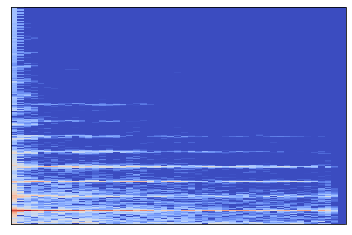

In [103]:
librosa.display.specshow(librosa.power_to_db(r**2), sr=22050)

In [89]:
i=stft.imag

In [94]:
IPython.display.Audio(librosa.istft(r+i*1j), rate=16000)

In [69]:
IPython.display.Audio(librosa.istft(temp), rate=16000)

In [86]:
IPython.display.Audio(librosa.istft(q+p*1j), rate=16000)

In [10]:
_, q, p=s.audioToSpec(a2, sound[0])

> /Users/zombie/Documents/Voice Dereverberation using U-net/spectrogram.py(28)magphase()
-> return mag, phase


(Pdb)  c


> /Users/zombie/Documents/Voice Dereverberation using U-net/spectrogram.py(28)magphase()
-> return mag, phase


(Pdb)  c


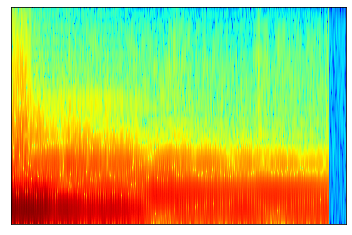

In [16]:
librosa.display.specshow(q, sr=16000, cmap=cm.jet)

In [58]:
phaseAngle=np.angle(q)

In [59]:
phase=np.cos(phaseAngle+1j*np.sin(phaseAngle))

In [60]:
IPython.display.Audio(librosa.istft(q*np.exp(np.angle(p)*1j)), rate=22050)

In [61]:
IPython.display.Audio(librosa.istft(q*phase), rate=16000)

In [63]:
q*phase.imag

array([[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         1.0705573e-12,  1.0687846e-12,  1.0632645e-12],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         1.0707535e-12,  1.0691386e-12,  1.0633876e-12],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         1.0713410e-12,  1.0702022e-12,  1.0637574e-12],
       ...,
       [ 9.1117414e-14,  1.5706941e-13,  6.0663432e-13, ...,
         1.2075182e-12,  1.1077133e-12,  1.2676925e-12],
       [ 9.1049449e-14,  1.5703671e-13,  6.6991557e-13, ...,
         1.2353726e-12,  1.1083559e-12,  1.2649060e-12],
       [ 9.1026741e-14,  1.5702608e-13,  7.7037931e-13, ...,
         1.2497813e-12,  1.1085725e-12,  1.2639196e-12]], dtype=float32)

In [65]:
librosa.stft(sound[0])

array([[-2.0338531e+01+0.0000000e+00j, -1.9302469e+01+0.0000000e+00j,
        -1.3472146e+01+0.0000000e+00j, ...,
        -4.6078306e-01+0.0000000e+00j, -3.6599722e-02+0.0000000e+00j,
         1.6609041e-04+0.0000000e+00j],
       [ 1.0836876e+01-9.3675068e-17j,  9.8313274e+00+8.9351016e-01j,
         7.9125185e+00+4.8154130e+00j, ...,
         6.1494522e-02+3.6936200e-01j, -6.9035240e-03+3.2955498e-02j,
        -1.0604682e-04+9.8912233e-06j],
       [-3.4033802e+00+2.5057913e-15j,  7.4736333e-01+2.5100124e+00j,
        -7.7698553e-01-2.6051340e+00j, ...,
         2.2904009e-01-1.8057233e-02j,  3.1030975e-02+4.3203407e-03j,
        -1.1161289e-05+2.0351768e-05j],
       ...,
       [ 3.9630479e-01+8.1100001e-16j, -1.9816992e-01+2.4495739e-04j,
         4.2301222e-06-4.3372502e-06j, ...,
         4.3687278e-06-4.6300770e-06j,  4.5462475e-06+2.6487392e-06j,
        -9.3361996e-06-4.3421833e-06j],
       [-3.9613816e-01-4.6837534e-16j, -6.4071741e-05+1.9790590e-01j,
        -3.1656615e-04